# Tensorflow MNIST data call and study several issues at the bottom

## Call tensorflow mnist data
### references
1. MNIST 초급: https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## call the image
### reference
1. 이미지 처리 기초: https://datascienceschool.net/view-notebook/9af8d8e93c084bc49f0ac2bb8a20e2a4/
2. https://cinema4dr12.tistory.com/1258

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(type(mnist))
print(type(mnist.train))
print(mnist.train)
# type(mnist.train.shape)
print ('====')
print(type(mnist.train.images)) # ndarray
# print(mnist.train.images[0])
print(mnist.train.images.dtype) # float32
print(mnist.train.images.ndim) # 2D
print(mnist.train.images.size) # 43120000
print ('====')
print(type(mnist.train.labels)) # ndarray
# print(mnist.train.labels[0])
print(mnist.train.labels.dtype) # float64
print(mnist.train.labels.ndim) # 2D
print(mnist.train.labels.size) # 550000
print ('====')


<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
====
<class 'numpy.ndarray'>
float32
2
43120000
====
<class 'numpy.ndarray'>
float64
2
550000
====


(55000, 784)


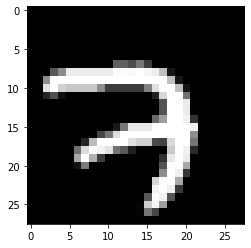

In [5]:
print(mnist.train.images.shape) # 55000 images and 1 image with 784 pixels. (28*28 image)
[n_image,n_pix] = mnist.train.images.shape
# each pixel values range is [0,1]

temp = np.zeros((28,28),dtype='float32')

for i in range(n_pix):
    [row_n,col_n] = divmod(i,28) # quotient -> row, remainder -> col
    temp[row_n, col_n] = mnist.train.images[0,i]

plt.imshow(temp, cmap='gray')

In [6]:
print(mnist.train.labels.shape)
[n_image,n_pix] = mnist.train.labels.shape

print(type(mnist.train.labels[0]))
print(mnist.train.labels[0])
print(np.where(mnist.train.labels[0] == 1))
print(type(np.where(mnist.train.labels[0] == 1)))
print(np.where(mnist.train.labels[0] == 1)[0][0]) # index of the number => it means, it seems like number 7

(55000, 10)
<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(array([7], dtype=int64),)
<class 'tuple'>
7


## Softmax regression from tutorial
* it will make result in float type. for that reason, use float type for label array.
1. calculate evidence that data include in each class.
2. change calculated result in probability

* details
1. sum(intensity (darkness) * weight) => - or +
2. + bias on above result.
$$ => evidence_i = \sum_{j} {W_(i,j)x_j} + b_i$$

$$ y = softmax(evidence) $$

$$ softmax(x) = normalize(exp(x)) $$
$$ softmax(x)_i = {exp(x_i)\over \sum_{j} {exp(x_j)} } $$

$$ y=softmax(Wx + b)$$



In [7]:
import tensorflow as tf

# placeholder: assign input data
x = tf.placeholder(tf.float32, [None, 784])
print(type(x))

# variable: used in calulation and updated by calculation (model variables)
W = tf.Variable(tf.zeros([784, 10])) # Weight
b = tf.Variable(tf.zeros([10])) # bias 

<class 'tensorflow.python.framework.ops.Tensor'>


In [8]:
# as it is matrix calculation, input order and dimension is important
y = tf.nn.softmax(tf.matmul(x,W) + b)

## Learning
### Cross entrophy
$$ H_{y^{'}}(y) = - \sum_{i} {y_i^{'} log(y_i)}$$




In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# tf.log : log value of each element 
# tf.reduce_sum : sum the value at indices  (here, sum the value at [1] (second element))
# tf.reduce_mean : get the mean of all example of batch


In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# Gradient desenct algorithm... optimizer function minimize cross entrophy.
# at the behind, it adds"Back Propagation", "gradient descent" works on graph 

In [11]:
## initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [12]:

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## Evaluate model


In [13]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
print(correct_prediction)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [14]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy)

Tensor("Mean_1:0", shape=(), dtype=float32)


In [15]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9182


# ----------------------------------
# Tensorflow structure




In [16]:
# setting - load the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Tensorflow InteractiveSession: connect backend  - divide work of computation graph and graph loading work.
import tensorflow as tf
sess = tf.InteractiveSession()

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [17]:
# Softmax regression model

# Placeholder : space for the value what may need tensorflow computation
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Variable
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# initialization
sess.run(tf.global_variables_initializer())


# cost function
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))



In [18]:
# model training
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for i in range(1000):
  batch = mnist.train.next_batch(50)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [19]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9179


## Convolution neural network 

In [20]:
# initialize weight => break symmetric and 0 gradient, give noise..! (unstable)
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# + give small positive value '0.1'
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [21]:
# convolution
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# padding: output size == input size


# pooling
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [22]:
# first convolution layer (convolition + max pooling)
# W_conv1 : 5x5 patch(window) 1 input Ch, 32 filters.
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# input image (x => reshape 4D tensor. -1..? , width, height, # of Color CH)
# => 4D tensor data
x_image = tf.reshape(x, [-1,28,28,1]) # 28x28

# apply convolution (relu(conv + bias)) + max pooling
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 14x14

In [23]:
# second convolution layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 7x7

In [24]:
# Fully connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)



In [25]:
# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# Final Softmax layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [27]:
# train and evaluation
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={                            # get accuracy
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))            # print step and accuracy at every 100 step.
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})   # train.


step 0, training accuracy 0.04
step 100, training accuracy 0.88
step 200, training accuracy 0.82
step 300, training accuracy 0.92
step 400, training accuracy 0.92
step 500, training accuracy 0.9
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.98
step 900, training accuracy 0.96
step 1000, training accuracy 0.92
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 1
step 1400, training accuracy 0.96
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 1
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.96
step 2800, training accuracy 0.98
step 2900, training accuracy 0.96
step 3000, 

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Conv2D (defined at <ipython-input-21-d45f23fc3c83>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Mean_5/_35]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Conv2D (defined at <ipython-input-21-d45f23fc3c83>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node Conv2D:
 Variable_4/read (defined at <ipython-input-20-8aff02e9ca47>:4)	
 Reshape (defined at <ipython-input-22-c004daf4518b>:8)

Input Source operations connected to node Conv2D:
 Variable_4/read (defined at <ipython-input-20-8aff02e9ca47>:4)	
 Reshape (defined at <ipython-input-22-c004daf4518b>:8)

Original stack trace for 'Conv2D':
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-c004daf4518b>", line 11, in <module>
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
  File "<ipython-input-21-d45f23fc3c83>", line 3, in conv2d
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1953, in conv2d
    name=name)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1071, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [28]:

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Conv2D (defined at <ipython-input-21-d45f23fc3c83>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Mean_5/_35]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Conv2D (defined at <ipython-input-21-d45f23fc3c83>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node Conv2D:
 Variable_4/read (defined at <ipython-input-20-8aff02e9ca47>:4)	
 Reshape (defined at <ipython-input-22-c004daf4518b>:8)

Input Source operations connected to node Conv2D:
 Variable_4/read (defined at <ipython-input-20-8aff02e9ca47>:4)	
 Reshape (defined at <ipython-input-22-c004daf4518b>:8)

Original stack trace for 'Conv2D':
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-c004daf4518b>", line 11, in <module>
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
  File "<ipython-input-21-d45f23fc3c83>", line 3, in conv2d
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1953, in conv2d
    name=name)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1071, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\MBIS\anaconda3\envs\tensorflow114_py37\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
